# Python Data Analysis Project
## English Premier League 2020/2021 Season Stats
### by Alex Mogengo

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
## load the data to a data frame
epl=pd.read_csv("D:\Projects\SQL\Data\PL_20_21.csv")
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [395]:
### lets try to understand more the dataset
epl.shape

(532, 18)

In [5]:
epl.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [6]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

### Check for nulls

In [389]:
## check for nulls
epl.isnull()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Age_groups,goals_per_match,mins_per_goal
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
530,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### check for duplicated rows

In [391]:
##check for duplicated rows
duplicated_rows=epl.duplicated()
print(duplicated_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
527    False
528    False
529    False
530    False
531    False
Length: 532, dtype: bool


## 1. Totals on important metrics


Now that our data is clean, we can begin the Analysis of the important metrics in the 2020/2021 season.

In this section we are going to find out the totals in most aspects of the game. This includes goals, assists, passess attempted and completed, penalties attemped & goals, yellow cards and red cards

In [397]:
### 1.1. Total goals in the season
total_goals=epl['Goals'].sum()
total_goals

986

In [396]:
### 1.2. Total assists in the season
total_assists=epl['Assists'].sum()
total_assists

685

In [401]:
### 1.3. Total passes attempted in the season
total_passes_attempted=epl['Passes_Attempted'].sum()
total_passes_attempted

381843

In [400]:
### average passes attempted in the season per game
avg_passes_per_game=total_passes_attempted/380
avg_passes_per_game

1004.85

In [399]:
### 1.4. Average passing accuracy for the season
Passing_accuracy=epl['Perc_Passes_Completed'].mean()
Passing_accuracy

77.82387218045119

In [398]:
### 1.5. Total penalties attempted
Total_penalties=epl['Penalty_Attempted'].sum()
Total_penalties

125

In [402]:
### 1.6. total Penalty goals 
total_penalty_goals=epl['Penalty_Goals'].sum()
total_penalty_goals

102

In [15]:
### Penalty conversion rate average for the season
pen_conversion_rate=total_penalty_goals/Total_penalties*100
pen_conversion_rate

81.6

In [403]:
### Total yellow cards in the season
Total_yellow_cards=epl['Yellow_Cards'].sum()
Total_yellow_cards

1125

In [21]:
### average yellow cards in a game
avg_yellow_cards=Total_yellow_cards/380
avg_yellow_cards

2.960526315789474

In [405]:
### Total red cards in the season
Total_red_cards=epl['Red_Cards'].sum()
Total_red_cards

48

The above analysis shows the main metrics of the season. These metrics reprsented the total cumulative for all the teams involved in the 2020/2021 English Premier League season. Summary is presented below:

Total goals score:        986
Total assists provided:   685
Total penalties awarded:  125
Total penalties scored:   102
Penalty conversion rate:  81.6%
Total passes attempted:   381843
Average Passing accuracy: 77.82%
Average passes per game:  1004
Total red cards           48
Total yellow cards        1125
Average yellow cards per game: 2.96

## 2. Players Positions

In [22]:
## Lets find out the uique positions
Positions=epl['Position'].unique()
Positions

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [34]:
## the total number of players in the season per position
No_of_players_by_position=epl.groupby(['Position'])['Name'].count()
No_of_players_by_position.sort_values(ascending=False)

Position
DF       178
MF       108
FW        81
FW,MF     47
GK        42
MF,FW     36
DF,MF     15
MF,DF     13
DF,FW      6
FW,DF      6
Name: Name, dtype: int64

In [35]:
###Also find the countries in which the players come from

In [43]:
## lets first find the number of countries of origin in which the players came from
no_of_countries=np.size(epl['Nationality'].unique())
print(no_of_countries)

59


In [44]:
## get the names (initials) of countries of origin in which the players came from
player_countries=epl['Nationality'].unique()
print(player_countries)

['ENG' 'SEN' 'GER' 'ESP' 'FRA' 'ITA' 'BRA' 'CRO' 'USA' 'DEN' 'MAR' 'SCO'
 'ARG' 'POR' 'BEL' 'ALG' 'UKR' 'NED' 'SWE' 'URU' 'SRB' 'WAL' 'CIV' 'NGA'
 'EGY' 'TUR' 'CMR' 'GUI' 'SUI' 'JPN' 'IRL' 'GRE' 'NIR' 'GHA' 'AUT' 'JAM'
 'RSA' 'CZE' 'POL' 'PAR' 'COD' 'KOR' 'COL' 'GAB' 'NOR' 'AUS' 'BIH' 'ISL'
 'MKD' 'BFA' 'ZIM' 'SVK' 'MEX' 'CAN' 'MLI' 'IRN' 'NZL' 'MTN' 'SKN']


In [55]:
## Number of player per country
## sort the results in descending order by number of players
#show the first 20  countries with many players
player_per_country=epl.groupby('Nationality')['Name'].count()
print(player_per_country.sort_values(ascending=False).head(20))

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
GER      9
ARG      8
CIV      8
NGA      7
DEN      6
SUI      6
USA      6
SEN      5
EGY      5
COL      5
Name: Name, dtype: int64


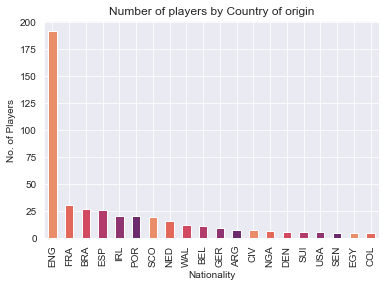

In [71]:
## lets visualize the number of players in barchart plot
import seaborn as sns
sns.set_style("darkgrid")
player_per_country.sort_values(ascending=False).head(20).plot(kind='bar', color=sns.color_palette("flare"))
plt.ylabel("No. of Players")
plt.title("Number of players by Country of origin")
plt.show()

In [59]:
### let's investigate the squad depth
squad_depth=epl.groupby('Club')['Name'].count()
squad_depth.sort_values(ascending=False)

Club
West Bromwich Albion       30
Arsenal                    29
Everton                    29
Southampton                29
Manchester United          29
Fulham                     28
Liverpool FC               28
Leicester City             27
Chelsea                    27
Newcastle United           27
Sheffield United           27
Brighton                   27
Wolverhampton Wanderers    27
Burnley                    25
Crystal Palace             24
Aston Villa                24
Manchester City            24
Tottenham Hotspur          24
West Ham United            24
Leeds United               23
Name: Name, dtype: int64

## Categorize players by age

In the Premier League there are playersof different ages, teenagers barely 18 while there are also legends of over 36 years!
So in this section, I am going to do an analysis by breaking down the ages of players into different groupsm to establish which age group has the highest number of players

In [84]:
### Age of the oldest player
oldest_player=epl['Age'].max()
print(oldest_player)

38


In [88]:
### Age of the youngest player
youngest_player=epl['Age'].min()
print(youngest_player)

16


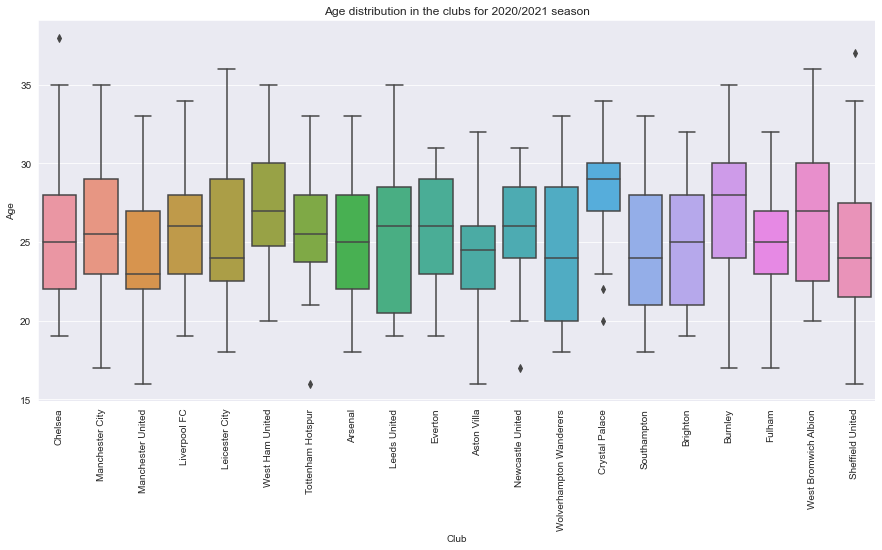

In [382]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Club', y='Age', data=epl)
plt.xticks(rotation=90)
plt.title("Age distribution in the clubs for 2020/2021 season")
plt.show()

In [96]:
##create the age ranges & groups
age_range=[16, 20, 25, 30, 35, 40]
range_names=['16-20 years', '21-25 years', '26-30 years', '31-35 years', '36-40 years']
epl['Age_groups']=pd.cut(epl['Age'], bins=age_range, labels=range_names)
epl['Age_groups']

0      21-25 years
1      26-30 years
2      21-25 years
3      21-25 years
4      16-20 years
          ...     
527    21-25 years
528    26-30 years
529    21-25 years
530            NaN
531    16-20 years
Name: Age_groups, Length: 532, dtype: category
Categories (5, object): ['16-20 years' < '21-25 years' < '26-30 years' < '31-35 years' < '36-40 years']

In [105]:
age_distribution=epl.groupby('Age_groups')['Age'].count().sort_values(ascending=False)
print(age_distribution)


Age_groups
26-30 years    197
21-25 years    186
16-20 years     74
31-35 years     67
36-40 years      4
Name: Age, dtype: int64


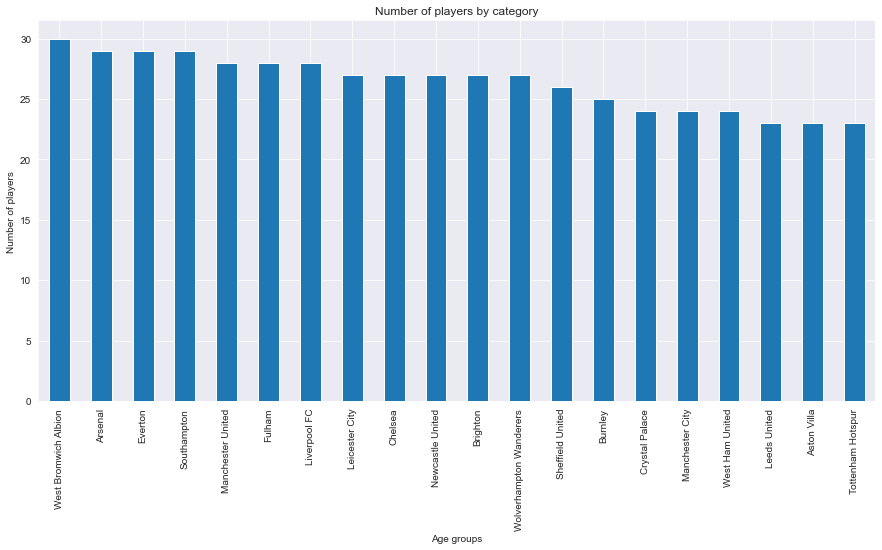

In [383]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
age_distribution.plot(kind='bar')
plt.ylabel("Number of players")
plt.xlabel("Age groups")
plt.title("Number of players by category")
plt.show()

In [131]:
## breakdown of the players age groups by club
Under_20=epl.groupby('Club').sum()
Under_20

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
Club,,,,,,,,,,,,,,
Arsenal,724,532,418,37453,53,38,21291,2356.6,6,6,3.66,2.42,49,5
Aston Villa,583,509,418,37532,52,38,16556,1843.1,5,6,3.28,2.04,71,4
Brighton,663,526,418,37576,39,24,19456,1943.7,6,9,3.39,2.36,49,6
Burnley,676,499,418,37620,32,20,15043,1686.4,3,3,2.17,1.13,48,0
Chelsea,691,526,418,37510,56,38,25151,2268.9,8,10,3.70,2.32,51,3
Crystal Palace,680,513,418,37594,39,29,15092,1788.7,3,4,1.62,1.09,56,2
Everton,737,524,418,37600,45,32,18246,2306.1,4,5,2.47,1.78,59,2
Fulham,701,528,418,37541,26,18,18860,2287.9,3,6,2.99,1.67,67,3
Leeds United,583,525,418,37574,60,45,20043,1825.8,4,4,2.68,2.00,61,1


In [171]:
## identify the names of the under 20 players
u20_players=epl[epl['Age'] <=20]
print(u20_players)
# count the number of under 20 players
print(u20_players.count())

                   Name              Club Nationality Position  Age  Matches  \
4           Reece James           Chelsea         ENG       DF   20       32   
18   Callum Hudson-Odoi           Chelsea         ENG    FW,DF   19       23   
21        Billy Gilmour           Chelsea         SCO       MF   19        5   
39           Phil Foden   Manchester City         ENG    FW,MF   20       28   
41       FerrÃ¡n Torres   Manchester City         ESP    FW,MF   20       24   
..                  ...               ...         ...      ...  ...      ...   
519      Rhian Brewster  Sheffield United         ENG       FW   20       27   
520        Jayden Bogle  Sheffield United         ENG       DF   20       16   
526     Daniel Jebbison  Sheffield United         ENG       FW   17        4   
530   Antwoine Hackford  Sheffield United         ENG    DF,FW   16        1   
531         Femi Seriki  Sheffield United         ENG       DF   17        1   

     Starts  Mins  Goals  Assists  Pass

In [185]:
## Under 20 years players by teams
u20=u20_players.groupby('Club')['Name'].count()
print(u20.sort_values(ascending=False))

Club
Wolverhampton Wanderers    8
Southampton                7
Manchester United          7
Leeds United               6
Sheffield United           6
Arsenal                    5
Everton                    4
Leicester City             4
Manchester City            4
Brighton                   4
Liverpool FC               4
Aston Villa                3
Chelsea                    3
Newcastle United           3
Burnley                    3
Fulham                     2
West Bromwich Albion       2
Crystal Palace             1
Tottenham Hotspur          1
West Ham United            1
Name: Name, dtype: int64


Text(0.5, 1.0, 'Under 20 years players by club')

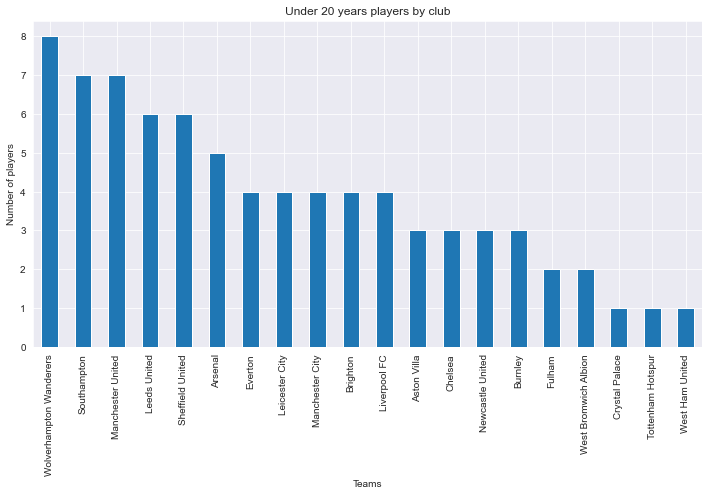

In [384]:
plt.figure(figsize=(12,6))
u20.sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Teams")
plt.ylabel("Number of players")
plt.title("Under 20 years players by club")

In [183]:
## between 21-25 years players by teams
 

u25_players=epl[(epl['Age']>= 21) & (epl['Age']<=25)]
print(u25_players)


                  Name              Club Nationality Position  Age  Matches  \
0          Mason Mount           Chelsea         ENG    MF,FW   21       36   
2          Timo Werner           Chelsea         GER       FW   24       35   
3         Ben Chilwell           Chelsea         ENG       DF   23       27   
9           Kurt Zouma           Chelsea         FRA       DF   25       24   
12   Christian Pulisic           Chelsea         USA    FW,MF   21       27   
..                 ...               ...         ...      ...  ...      ...   
518    Oliver McBurnie  Sheffield United         SCO       FW   24       23   
521         Kean Bryan  Sheffield United         ENG       DF   23       13   
524           Max Lowe  Sheffield United         ENG       DF   23        8   
527        Lys Mousset  Sheffield United         FRA    FW,MF   24       11   
529      Iliman Ndiaye  Sheffield United         FRA       MF   21        1   

     Starts  Mins  Goals  Assists  Passes_Attempted

In [188]:
## players between 20 & 25 years by club
## Under 20 years players by teams
u25=u25_players.groupby('Club')['Name'].count()
print(u25.sort_values(ascending=False))

Club
Fulham                     14
Aston Villa                14
Chelsea                    12
Leicester City             12
Arsenal                    11
Manchester United          11
Brighton                   11
Tottenham Hotspur          11
Southampton                11
West Bromwich Albion       10
Everton                    10
Sheffield United            9
Liverpool FC                9
Manchester City             8
Wolverhampton Wanderers     8
Newcastle United            7
West Ham United             6
Leeds United                5
Burnley                     4
Crystal Palace              3
Name: Name, dtype: int64


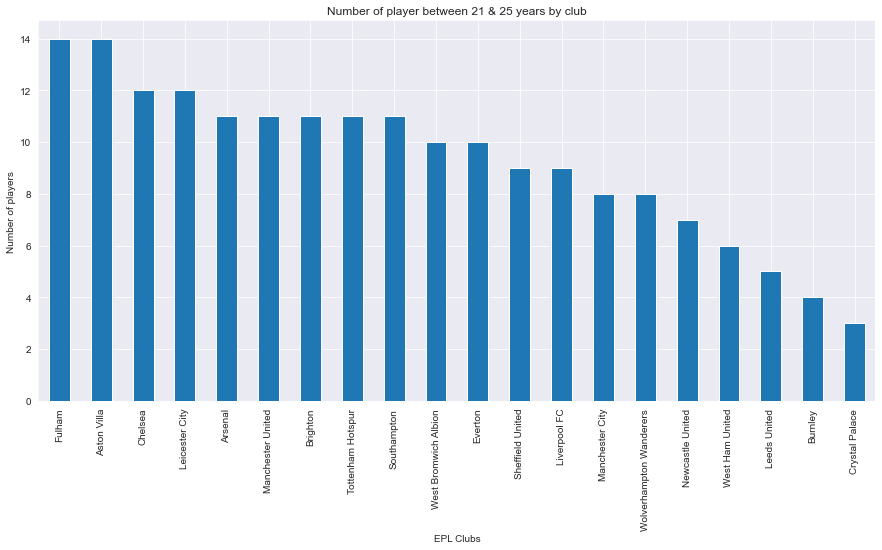

In [385]:
plt.figure(figsize=(15,7))
u25.sort_values(ascending=False).plot(kind='bar')
plt.xlabel("EPL Clubs")
plt.ylabel("Number of players")
plt.title("Number of player between 21 & 25 years by club")
plt.show()

In [194]:
### players between 26 to 30 years by club
u30_players=epl[(epl['Age']>= 26) & (epl['Age']<=30)]
print(u30_players)



                   Name              Club Nationality Position  Age  Matches  \
1         Edouard Mendy           Chelsea         SEN       GK   28       31   
5    CÃ©sar Azpilicueta           Chelsea         ESP       DF   30       26   
6         N'Golo KantÃ©           Chelsea         FRA       MF   29       30   
7              Jorginho           Chelsea         ITA       MF   28       28   
10      Mateo KovaÄiÄ‡           Chelsea         CRO       MF   26       27   
..                  ...               ...         ...      ...  ...      ...   
510          John Fleck  Sheffield United         SCO       MF   28       31   
512      Oliver Norwood  Sheffield United         NIR       MF   29       32   
514      John Lundstram  Sheffield United         ENG       MF   26       28   
522       Jack Robinson  Sheffield United         ENG       DF   26       11   
528      Jack O'Connell  Sheffield United         ENG       DF   26        2   

     Starts  Mins  Goals  Assists  Pass

In [312]:

##the no. of players between 26 & 30 by club
u30=u30_players.groupby('Club')['Name'].count()
print(u30.sort_values(ascending=False))


Club
Crystal Palace             15
Newcastle United           14
Liverpool FC               13
Everton                    13
Burnley                    12
West Ham United            12
Brighton                   11
West Bromwich Albion       11
Arsenal                    10
Fulham                     10
Manchester City             9
Leeds United                9
Tottenham Hotspur           9
Chelsea                     9
Sheffield United            8
Southampton                 8
Manchester United           7
Wolverhampton Wanderers     7
Leicester City              5
Aston Villa                 5
Name: Name, dtype: int64


In [204]:
### players between 26 to 30 years by club
u40_players=epl[(epl['Age']>= 36) & (epl['Age']<=40)]
print(u40_players)



                    Name                  Club Nationality Position  Age  \
22       Willy Caballero               Chelsea         ARG       GK   38   
133           Wes Morgan        Leicester City         JAM       DF   36   
493  Branislav IvanoviÄ‡  West Bromwich Albion         SRB       DF   36   
525        Phil Jagielka      Sheffield United         ENG       DF   37   

     Matches  Starts  Mins  Goals  Assists  Passes_Attempted  \
22         1       1    90      0        0                26   
133        3       0    18      0        0                 5   
493       13       8   767      0        0               311   
525       10       6   526      0        0               186   

     Perc_Passes_Completed  Penalty_Goals  Penalty_Attempted    xG    xA  \
22                    92.3              0                  0  0.00  0.00   
133                  100.0              0                  0  0.00  0.00   
493                   85.2              0                  0  0.06  0.

In [202]:
##the no. of players between 26 & 30 by club
u40=u40_players.groupby('Club')['Name'].count()
print(u40.sort_values(ascending=False))



Club
Chelsea                 1
Leicester City          1
Sheffield United        1
West Bromwich Albion    1
Name: Name, dtype: int64


Text(0.5, 1.0, 'No of player between 36 & 40 years by club')

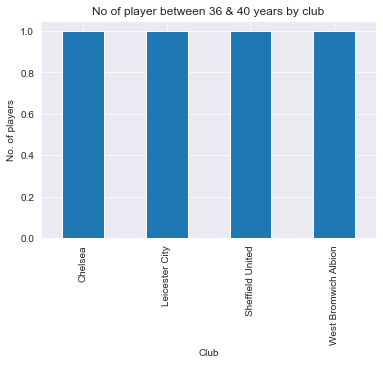

In [203]:
u40.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Club')
plt.ylabel("No. of players")
plt.title("No of player between 36 & 40 years by club")

In [209]:
## Arrange the teams according to the age of their squads in descending order

avg_age=epl.groupby('Club')['Age'].mean()
print(avg_age.sort_values(ascending=False))

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
Name: Age, dtype: float64


In [250]:
GA=epl[['Name', 'Club', 'Goals', 'Assists']]
GA_sorted=GA.sort_values('Goals', ascending=False).head(15)
print(GA_sorted)

                      Name               Club  Goals  Assists
162             Harry Kane  Tottenham Hotspur     23       14
81           Mohamed Salah       Liverpool FC     22        5
51         Bruno Fernandes  Manchester United     18       12
214        Patrick Bamford       Leeds United     17        7
161          Son Heung-min  Tottenham Hotspur     17       10
237  Dominic Calvert-Lewin            Everton     16        0
110            Jamie Vardy     Leicester City     15        9
267          Ollie Watkins        Aston Villa     14        5
33       Ä°lkay GÃ¼ndoÄŸan    Manchester City     13        2
191    Alexandre Lacazette            Arsenal     13        2
428             Chris Wood            Burnley     12        3
374             Danny Ings        Southampton     12        4
120      Kelechi Iheanacho     Leicester City     12        2
292          Callum Wilson   Newcastle United     12        5
54         Marcus Rashford  Manchester United     11        9


<Figure size 1080x504 with 0 Axes>

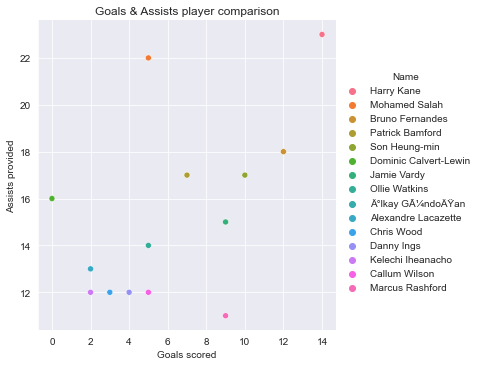

In [386]:
plt.figure(figsize=(15,7))
sns.set_style("darkgrid")
sns.relplot(x='Assists',
            y='Goals',
           data=GA_sorted,
           kind='scatter',
           hue='Name')
plt.xlabel("Goals scored")
plt.ylabel("Assists provided")
plt.title("Goals & Assists player comparison")
plt.show()

In [246]:
top_scorers=epl[['Name', 'Club', 'Goals', 'Assists']]
print(top_scorers.sort_values('Goals', ascending=False).head(15))

                      Name                  Club  Goals  Assists
162             Harry Kane     Tottenham Hotspur     23       14
81           Mohamed Salah          Liverpool FC     22        5
51         Bruno Fernandes     Manchester United     18       12
214        Patrick Bamford          Leeds United     17        7
161          Son Heung-min     Tottenham Hotspur     17       10
237  Dominic Calvert-Lewin               Everton     16        0
110            Jamie Vardy        Leicester City     15        9
267          Ollie Watkins           Aston Villa     14        5
33       Ä°lkay GÃ¼ndoÄŸan       Manchester City     13        2
191    Alexandre Lacazette               Arsenal     13        2
428             Chris Wood               Burnley     12        3
374             Danny Ings           Southampton     12        4
120      Kelechi Iheanacho        Leicester City     12        2
292          Callum Wilson      Newcastle United     12        5
54         Marcus Rashfor

<Figure size 1080x504 with 0 Axes>

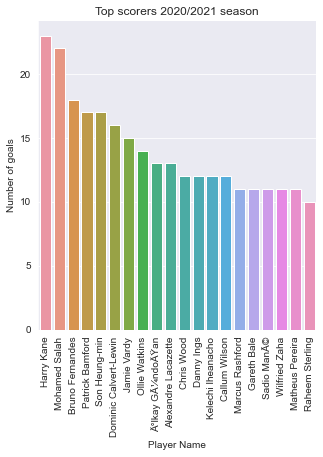

In [387]:
# visualize the top scorers data in a bar chart
plt.figure(figsize=(15,7))
g=sns.catplot(x='Name',
           y='Goals',
            kind='bar',
           data=top_scorers.sort_values('Goals', ascending=False).head(20))
plt.xticks(rotation=90)
g.set(xlabel="Player Name",
     ylabel="Number of goals",
     title="Top scorers 2020/2021 season")
plt.show()
        


## Aggression

In [257]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   532 non-null    object  
 1   Club                   532 non-null    object  
 2   Nationality            532 non-null    object  
 3   Position               532 non-null    object  
 4   Age                    532 non-null    int64   
 5   Matches                532 non-null    int64   
 6   Starts                 532 non-null    int64   
 7   Mins                   532 non-null    int64   
 8   Goals                  532 non-null    int64   
 9   Assists                532 non-null    int64   
 10  Passes_Attempted       532 non-null    int64   
 11  Perc_Passes_Completed  532 non-null    float64 
 12  Penalty_Goals          532 non-null    int64   
 13  Penalty_Attempted      532 non-null    int64   
 14  xG                     532 non-null    flo

In [292]:
aggression=epl[['Club', 'Yellow_Cards', 'Red_Cards']]
print(aggression.head())


      Club  Yellow_Cards  Red_Cards
0  Chelsea             2          0
1  Chelsea             2          0
2  Chelsea             2          0
3  Chelsea             3          0
4  Chelsea             3          0


In [291]:
# group the Clubs according to the number of Yellow cards their players received
# sort the clubs with the yellow cards recieved in descending order
yellow_cards_grouped=aggression.groupby('Club')['Yellow_Cards'].sum()
yellow_cards_grouped.sort_values(ascending=False)

Club
Sheffield United           73
Aston Villa                71
Fulham                     67
Newcastle United           65
Manchester United          64
Leeds United               61
Leicester City             61
Everton                    59
Tottenham Hotspur          57
Crystal Palace             56
Wolverhampton Wanderers    55
Southampton                52
West Bromwich Albion       51
Chelsea                    51
West Ham United            50
Arsenal                    49
Brighton                   49
Burnley                    48
Manchester City            46
Liverpool FC               40
Name: Yellow_Cards, dtype: int64

In [295]:
cards_grouped=aggression.groupby('Club')[['Yellow_Cards', 'Red_Cards']].sum()
cards_grouped.sort_values(by='Yellow_Cards', ascending=False)

,Yellow_Cards,Red_Cards
Club,,
Sheffield United,73,3
Aston Villa,71,4
Fulham,67,3
Newcastle United,65,3
Manchester United,64,1
Leeds United,61,1
Leicester City,61,0
Everton,59,2
Tottenham Hotspur,57,2


<Figure size 1080x504 with 0 Axes>

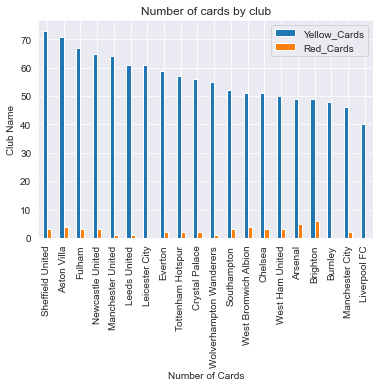

In [388]:
plt.figure(figsize=(15,7))
cards_grouped.sort_values(by='Yellow_Cards', ascending=False).plot(kind='bar')
plt.xlabel("Number of Cards")
plt.ylabel('Club Name')
plt.title('Number of cards by club')
plt.show()

In [342]:
#create a new colum to assess the goals per match for the players
epl['goals_per_match']=epl['Goals']/epl['Matches']
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Age_groups,goals_per_match
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,21-25 years,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,26-30 years,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,21-25 years,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,21-25 years,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,16-20 years,0.031250


In [323]:
# select the important metrics for the goals per match analysis
goals_per_match=epl[['Name', 'Club', 'Position', 'goals_per_match']]
goals_per_match.head()



,Name,Club,Position,goals_per_match
0,Mason Mount,Chelsea,"MF,FW",0.166667
1,Edouard Mendy,Chelsea,GK,0.000000
2,Timo Werner,Chelsea,FW,0.171429
3,Ben Chilwell,Chelsea,DF,0.111111
4,Reece James,Chelsea,DF,0.031250


In [325]:
## get the top 20 with top Goals per match ratio
Top_goals_per_match=goals_per_match.sort_values(by='goals_per_match', ascending=False)
print(Top_goals_per_match.head(20))

                      Name                     Club Position  goals_per_match
162             Harry Kane        Tottenham Hotspur       FW         0.657143
81           Mohamed Salah             Liverpool FC       FW         0.594595
307            Joe Willock         Newcastle United       MF         0.571429
145          Jesse Lingard          West Ham United    MF,FW         0.562500
175            Gareth Bale        Tottenham Hotspur       FW         0.550000
74          Anthony Elanga        Manchester United       FW         0.500000
51         Bruno Fernandes        Manchester United       MF         0.486486
237  Dominic Calvert-Lewin                  Everton       FW         0.484848
120      Kelechi Iheanacho           Leicester City       FW         0.480000
92              Diogo Jota             Liverpool FC       FW         0.473684
33       Ä°lkay GÃ¼ndoÄŸan          Manchester City       MF         0.464286
292          Callum Wilson         Newcastle United       FW    

In [327]:
position_goal_return=Top_goals_per_match.groupby('Position')['goals_per_match'].mean()
print(position_goal_return.sort_values(ascending=False))

Position
FW       0.204247
MF,FW    0.104288
FW,MF    0.102772
MF       0.056069
FW,DF    0.046090
MF,DF    0.038210
DF       0.034315
DF,FW    0.027698
DF,MF    0.021632
GK       0.000722
Name: goals_per_match, dtype: float64


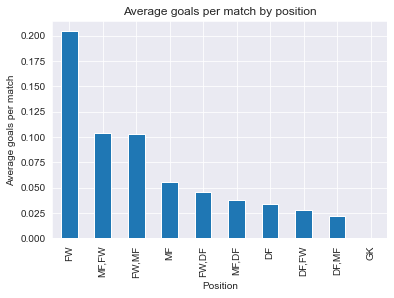

In [329]:
position_goal_return.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Average goals per match')
plt.title('Average goals per match by position')
plt.show()

In [332]:
### Goals scored by position
#sort them by goals in descending order
goals_scored_by_position=epl.groupby('Position')['Goals'].sum()

print(goals_scored_by_position.sort_values(ascending=False))

Position
FW       442
MF       171
DF       129
FW,MF    124
MF,FW     83
MF,DF     14
DF,MF     11
FW,DF      8
DF,FW      3
GK         1
Name: Goals, dtype: int64


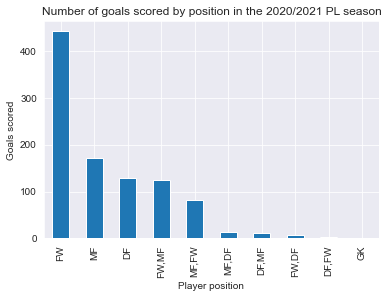

In [338]:
goals_scored_by_position.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Player position')
plt.ylabel('Goals scored')
plt.title('Number of goals scored by position in the 2020/2021 PL season')
plt.show()

In [339]:
### Assists provided by position
assists_provided=epl.groupby('Position')['Assists'].sum()
print(assists_provided.sort_values(ascending=False))

Position
FW       172
MF       162
DF       136
FW,MF     99
MF,FW     68
MF,DF     18
DF,MF     12
DF,FW      8
FW,DF      8
GK         2
Name: Assists, dtype: int64


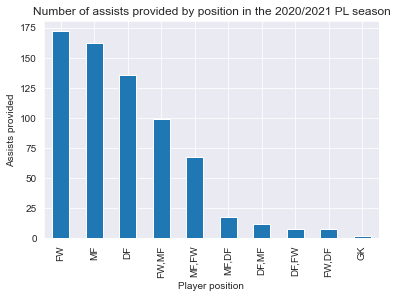

In [340]:
assists_provided.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Player position')
plt.ylabel('Assists provided')
plt.title('Number of assists provided by position in the 2020/2021 PL season')
plt.show()

In [367]:
## Calcualte the players with the best minutes per goal
### create the mins/goal column
###print the top 20 mins/goal
epl['mins_per_goal']=epl['Mins']/epl['Goals']
minutes_per_goal=epl[['Name', 'Club','Goals','mins_per_goal']]
print(minutes_per_goal.sort_values(by='mins_per_goal', ascending=True).head(20))


                      Name               Club  Goals  mins_per_goal
175            Gareth Bale  Tottenham Hotspur     11      83.636364
120      Kelechi Iheanacho     Leicester City     12     121.583333
307            Joe Willock   Newcastle United      8     122.250000
92              Diogo Jota       Liverpool FC      9     123.555556
162             Harry Kane  Tottenham Hotspur     23     134.000000
63          Edinson Cavani  Manchester United     10     137.500000
46          Sergio AgÃ¼ero    Manchester City      4     139.750000
81           Mohamed Salah       Liverpool FC     22     139.909091
191    Alexandre Lacazette            Arsenal     13     147.923077
74          Anthony Elanga  Manchester United      1     155.000000
33       Ä°lkay GÃ¼ndoÄŸan    Manchester City     13     156.076923
145          Jesse Lingard    West Ham United      9     157.888889
275         Anwar El Ghazi        Aston Villa     10     161.300000
197         Nicolas PÃ©pÃ©            Arsenal   